# House Price Prediction by using Artificial Neural Network(ANN)



In [ ]:
# Mounting Google Drive locally
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import data analysis libraries
import pandas as pd
import numpy as np

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Exploring the dataset

In [ ]:
# Load the dataset
df=pd.read_csv('/content/drive/My Drive/house price prediction/house_price.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
# Display columns
df.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

In [ ]:
# Number of rows and colummns
df.shape

(1460, 11)

In [ ]:
# Importing essential libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

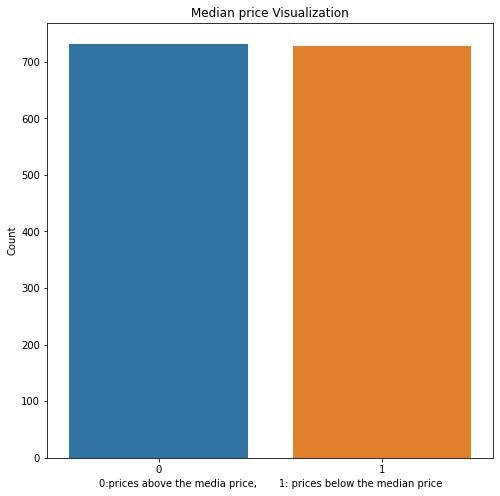

In [ ]:
# Visualizing the count of 'AboveMedianPrice' in the dataset
plt.figure(figsize=(8,8))
sns.countplot(x='AboveMedianPrice', data=df)
plt.xlabel('0:prices above the media price,       1: prices below the median price')
plt.ylabel('Count')
plt.title('Median price Visualization')
plt.show()

In [ ]:
# Count of 0 and 1
df['AboveMedianPrice'].value_counts()

0    732
1    728
Name: AboveMedianPrice, dtype: int64

In [ ]:
df.isnull().any()

LotArea             False
OverallQual         False
OverallCond         False
TotalBsmtSF         False
FullBath            False
HalfBath            False
BedroomAbvGr        False
TotRmsAbvGrd        False
Fireplaces          False
GarageArea          False
AboveMedianPrice    False
dtype: bool

# Data Preprocessing

In [ ]:
# Feature columns
X = df.drop('AboveMedianPrice', axis=1)

# Tatget column
Y = df['AboveMedianPrice']

In [ ]:
# Normalising all the feature columns :Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Display
X_train

array([[ 0.01928463,  0.64696917, -0.54242479, ...,  1.52517883,
         0.64546521,  2.22296323],
       [-0.1215419 , -0.08444952,  0.37690877, ..., -0.93436005,
         0.64546521, -0.43547709],
       [-0.21246149, -0.08444952, -0.54242479, ..., -1.54924477,
         0.64546521, -0.81112627],
       ...,
       [ 0.25448966,  0.64696917,  1.29624232, ...,  2.14006355,
         0.64546521,  0.04612442],
       [ 0.25458848,  0.64696917, -0.54242479, ...,  0.91029411,
         0.64546521,  0.8070548 ],
       [-0.01392078, -0.8158682 ,  1.29624232, ..., -0.31947533,
        -0.94409008,  0.19542089]])

In [ ]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


 # Building Artificial Neural Network (ANN)
 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu', input_dim=10))


In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu'))

In [ ]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the the model on the dataset
hist = classifier.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 212us/step - loss: 0.7319 - accuracy: 0.5000 - val_loss: 0.6859 - val_accuracy: 0.4932
Epoch 2/100
1022/1022 [==============================] - 0s 44us/step - loss: 0.6535 - accuracy: 0.5978 - val_loss: 0.6244 - val_accuracy: 0.7215
Epoch 3/100
1022/1022 [==============================] - 0s 44us/step - loss: 0.5916 - accuracy: 0.8200 - val_loss: 0.5674 - val_accuracy: 0.7854
Epoch 4/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.5304 - accuracy: 0.8249 - val_loss: 0.5093 - val_accuracy: 0.8356
Epoch 5/100
1022/1022 [==============================] - 0s 48us/step - loss: 0.4732 - accuracy: 0.8513 - val_loss: 0.4512 - val_accuracy: 0.8402
Epoch 6/100
1022/1022 [==============================] - 0s 48us/step - loss: 0.4167 - accuracy: 0.8640 - val_loss: 0.4057 - val_accuracy: 0.8402
Epoch 7/100
1022/1022 [==============================] - 0s 47us/step - loss

In [ ]:
# Evaluate the model
classifier.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 54us/step


0.9041095972061157

In [ ]:
# List all data in history
hist.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

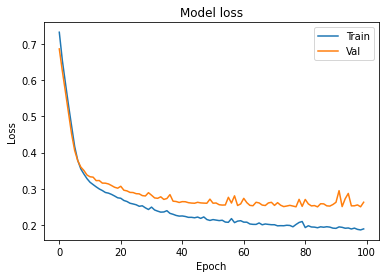

In [ ]:
# Plot Model loss
import matplotlib
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
# Headings
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


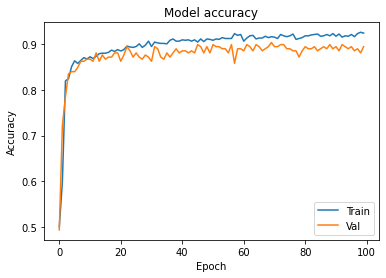

In [ ]:
# Plot Model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# L2 regularization and dropout
* ## Regularization help in reducing Overfitting for our model

In [ ]:
# Import regulizers and Dropout
from keras.layers import Dropout
from keras import regularizers

In [ ]:
# Added kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
classifier1= Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
# Compile
classifier1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit the model
hist1 = classifier1.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 14.7280 - accuracy: 0.6321 - val_loss: 4.0616 - val_accuracy: 0.7260
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.7295 - accuracy: 0.8386 - val_loss: 0.6807 - val_accuracy: 0.8539
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5777 - accuracy: 0.8591 - val_loss: 0.5643 - val_accuracy: 0.8493
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5059 - accuracy: 0.8748 - val_loss: 0.5240 - val_accuracy: 0.8721
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4876 - accuracy: 0.8757 - val_loss: 0.5485 - val_accuracy: 0.8447
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4740 - accuracy: 0.8845 - val_loss: 0.4860 - val_accuracy: 0.8630
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.521

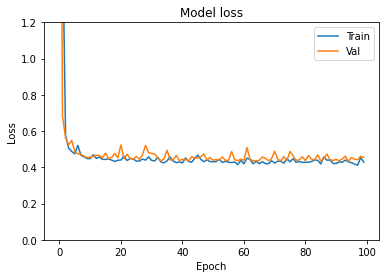

In [ ]:
# Plot Model Loss
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

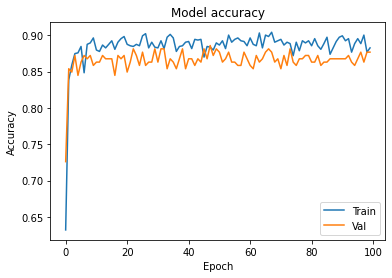

In [ ]:
# Plot Model accuracy
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
# Evaluate the model
scores= classifier1.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 88.13%


* ## Achieved 88.13% as accuracy with ANN model.